### **Data Mining Using SQL**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Shop.csv** and **Movies.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [ ]:
!pip install prettytable==0.7.2
!pip install ipython-sql

In [34]:
# Set-up
%load_ext sql
%sql sqlite://
import pandas as pd

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [35]:
# Load tables from CSV files
# Shop
with open('Shop.csv') as f: Shop = pd.read_csv(f, index_col=0)
%sql drop table if exists Shop;
%sql --persist Shop
# Movies
with open('Movies.csv') as f: Movies = pd.read_csv(f, index_col=0)
%sql drop table if exists Movies;
%sql --persist Movies

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.
 * sqlite://


'Persisted movies'

## Shopping dataset - frequent item-sets

In [36]:
%%sql
select * from Shop

 * sqlite://
Done.


TID,item
1,milk
1,eggs
1,juice
2,milk
2,juice
2,cookies
3,eggs
3,chips
4,milk
4,eggs


### Frequent item-sets of two

#### All pairs of items occurring together

In [37]:
%%sql
select T1.item as item1, T2.item as item2
from Shop T1, Shop T2
where T1.TID = T2.TID
and T1.item < T2.item

 * sqlite://
Done.


item1,item2
eggs,milk
eggs,juice
juice,milk
juice,milk
cookies,milk
cookies,juice
chips,eggs
eggs,milk
juice,milk
cookies,milk


#### Now with number of transactions they occur together in

In [38]:
%%sql
select T1.item as item1, T2.item as item2, count()
from Shop T1, Shop T2
where T1.TID = T2.TID
and T1.item < T2.item
group by T1.item, T2.item

 * sqlite://
Done.


item1,item2,count()
chips,cookies,1
chips,eggs,1
chips,juice,1
chips,milk,1
cookies,juice,2
cookies,milk,2
eggs,juice,1
eggs,milk,2
juice,milk,3


#### Total number of transactions

In [39]:
%%sql
select count(distinct TID) from Shop

 * sqlite://
Done.


count(distinct TID)
5


#### Put it together for frequent item-sets

In [40]:
support = .3
print(support)

0.3


In [41]:
%%sql
select T1.item as item1, T2.item as item2
from Shop T1, Shop T2
where T1.TID = T2.TID
and T1.item < T2.item
group by T1.item, T2.item
having 1.0*count() / (select count(distinct TID) from Shop) > :support

 * sqlite://
Done.


item1,item2
cookies,juice
cookies,milk
eggs,milk
juice,milk


### Frequent item-sets of three

#### All triples of items occurring together

In [42]:
%%sql
select T1.item as item1, T2.item as item2, T3.item as item3
from Shop T1, Shop T2, Shop T3
where T1.TID = T2.TID and T2.TID = T3.TID
and T1.item < T2.item and T2.item < T3.item

 * sqlite://
Done.


item1,item2,item3
eggs,juice,milk
cookies,juice,milk
cookies,juice,milk
chips,juice,milk
chips,cookies,milk
chips,cookies,juice


#### Now with number of transactions they occur together in

In [43]:
%%sql
select distinct T1.item as item1, T2.item as item2, T3.item as item3, count()
from Shop T1, Shop T2, Shop T3
where T1.TID = T2.TID and T2.TID = T3.TID
and T1.item < T2.item and T2.item < T3.item
group by T1.item, T2.item, T3.item

 * sqlite://
Done.


item1,item2,item3,count()
chips,cookies,juice,1
chips,cookies,milk,1
chips,juice,milk,1
cookies,juice,milk,2
eggs,juice,milk,1


#### Put it together for frequent item-sets

In [44]:
support = .3
print(support)

0.3


In [45]:
%%sql
select T1.item as item1, T2.item as item2, T3.item as item3
from Shop T1, Shop T2, Shop T3
where T1.TID = T2.TID and T2.TID = T3.TID
and T1.item < T2.item and T2.item < T3.item
group by T1.item, T2.item, T3.item
having 1.0*count() / (select count(distinct TID) from Shop) > :support

 * sqlite://
Done.


item1,item2,item3
cookies,juice,milk


### <font color = 'green'>**Your Turn - Movies dataset frequent item-sets**</font>

In [46]:
%%sql
select * from Movies limit 15

 * sqlite://
Done.


TID,item
145755,The Fault in Our Stars
145755,Boyhood
145755,Big Hero 6
145755,The Imitation Game
145755,Inside Out
117070,Inside Out
239040,Inside Out
177796,Gone Girl
177796,Magic Mike XXL
126875,The Imitation Game


In [ ]:
%%sql
select count(distinct TID) as numUsers,
       count(distinct item) as numMovies
from Movies

#### Mine for frequent item-sets of three and four items in the Movies dataset. Find a single support threshold where the number of frequent item-sets of three items is more than 10 but less than 20, and the number of frequent item-sets of four items is more than 0.

In [ ]:
support = INSERT VALUE HERE
print(support)

Dataset shape: (3383, 2)
=== DATA ANALYSIS ===


,total_users,total_movies,total_ratings
0,1382,123,3383



Total transactions (users): 1382

Transaction size distribution:
count    1382.000000
mean        2.447902
std         2.228079
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        28.000000
Name: movie_count, dtype: float64


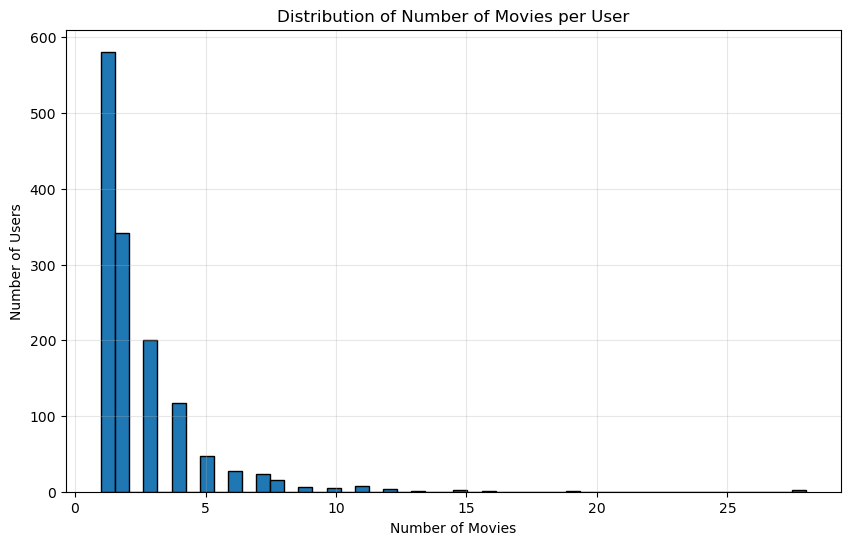


Transactions with 3+ movies: 460 (33.3%)
Transactions with 4+ movies: 259 (18.7%)
Transactions with 5+ movies: 142 (10.3%)

Top 20 most frequent movies:


,item,frequency,support
0,The Imitation Game,677,0.489870
1,Gone Girl,583,0.421852
2,Inside Out,450,0.325615
3,Big Hero 6,387,0.280029
4,Boyhood,228,0.164978
5,Fury,138,0.099855
6,The Fault in Our Stars,111,0.080318
7,Louis C.K.: Live at The Comedy Store,90,0.065123
8,Transformers: Age of Extinction,69,0.049928
9,Wild Tales,68,0.049204


In [5]:
import sqlite3
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Create SQLite connection
conn = sqlite3.connect(':memory:')

# Load the Movies dataset
Movies = pd.read_csv('Movies.csv')
print(f"Dataset shape: {Movies.shape}")

# Store in SQLite
Movies.to_sql('Movies', conn, index=False, if_exists='replace')

# First, let's get basic statistics
print("=== DATA ANALYSIS ===")
query_stats = """
SELECT 
    COUNT(DISTINCT TID) as total_users,
    COUNT(DISTINCT item) as total_movies,
    COUNT(*) as total_ratings
FROM Movies
"""
stats_df = pd.read_sql_query(query_stats, conn)
display(stats_df)

total_transactions = stats_df['total_users'][0]
print(f"\nTotal transactions (users): {total_transactions}")

# Get transaction sizes distribution
query_trans_size = """
SELECT TID, COUNT(*) as movie_count
FROM Movies
GROUP BY TID
ORDER BY movie_count DESC
"""
trans_df = pd.read_sql_query(query_trans_size, conn)

print("\nTransaction size distribution:")
print(trans_df['movie_count'].describe())

# Plot transaction sizes
plt.figure(figsize=(10, 6))
plt.hist(trans_df['movie_count'], bins=50, edgecolor='black')
plt.title('Distribution of Number of Movies per User')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Users')
plt.grid(True, alpha=0.3)
plt.show()

# Count transactions with specific sizes
print(f"\nTransactions with 3+ movies: {(trans_df['movie_count'] >= 3).sum()} ({((trans_df['movie_count'] >= 3).sum()/len(trans_df)*100):.1f}%)")
print(f"Transactions with 4+ movies: {(trans_df['movie_count'] >= 4).sum()} ({((trans_df['movie_count'] >= 4).sum()/len(trans_df)*100):.1f}%)")
print(f"Transactions with 5+ movies: {(trans_df['movie_count'] >= 5).sum()} ({((trans_df['movie_count'] >= 5).sum()/len(trans_df)*100):.1f}%)")

# Get top items frequencies
query_item_freq = """
SELECT item, COUNT(*) as frequency,
       1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) as support
FROM Movies
GROUP BY item
ORDER BY frequency DESC
LIMIT 20
"""
item_df = pd.read_sql_query(query_item_freq, conn)
print("\nTop 20 most frequent movies:")
display(item_df)

In [6]:
# Function to count frequent itemsets
def count_frequent_itemsets(k, support_threshold):
    """Count frequent itemsets of size k"""
    # Build the SQL query dynamically based on k
    select_parts = []
    from_parts = []
    where_parts = []
    
    for i in range(1, k+1):
        select_parts.append(f"T{i}.item as item{i}")
        from_parts.append(f"Movies T{i}")
        if i > 1:
            where_parts.append(f"T{i-1}.TID = T{i}.TID")
    
    # Add ordering condition to avoid duplicates
    for i in range(1, k):
        where_parts.append(f"T{i}.item < T{i+1}.item")
    
    query = f"""
    SELECT {', '.join(select_parts)}, COUNT(*) as frequency
    FROM {', '.join(from_parts)}
    WHERE {' AND '.join(where_parts)}
    GROUP BY {', '.join([f'item{i}' for i in range(1, k+1)])}
    HAVING 1.0*COUNT(*) / {total_transactions} > {support_threshold}
    """
    
    try:
        result_df = pd.read_sql_query(query, conn)
        return len(result_df), result_df
    except Exception as e:
        print(f"Error for k={k}, support={support_threshold}: {e}")
        return 0, pd.DataFrame()

# Test different support thresholds
print("Testing different support thresholds:")
print("="*60)

test_supports = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02]
results = []

for support in test_supports:
    count_3, itemsets_3 = count_frequent_itemsets(3, support)
    count_4, itemsets_4 = count_frequent_itemsets(4, support)
    
    results.append({
        'support': support,
        '3-itemsets': count_3,
        '4-itemsets': count_4
    })
    
    print(f"\nSupport: {support:.3f}")
    print(f"  Frequent 3-itemsets: {count_3}")
    print(f"  Frequent 4-itemsets: {count_4}")
    
    if 10 < count_3 < 20 and count_4 > 0:
        print(f"\n✓ Found suitable support threshold: {support}")
        print(f"  Frequent 3-itemsets: {count_3} (between 10 and 20)")
        print(f"  Frequent 4-itemsets: {count_4} (more than 0)")
        break

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("Summary of results:")
display(results_df)

Testing different support thresholds:

Support: 0.005
  Frequent 3-itemsets: 228
  Frequent 4-itemsets: 204

Support: 0.006
  Frequent 3-itemsets: 165
  Frequent 4-itemsets: 124

Support: 0.007
  Frequent 3-itemsets: 139
  Frequent 4-itemsets: 97

Support: 0.008
  Frequent 3-itemsets: 104
  Frequent 4-itemsets: 64

Support: 0.009
  Frequent 3-itemsets: 90
  Frequent 4-itemsets: 54

Support: 0.010
  Frequent 3-itemsets: 81
  Frequent 4-itemsets: 44

Support: 0.012
  Frequent 3-itemsets: 59
  Frequent 4-itemsets: 26

Support: 0.015
  Frequent 3-itemsets: 39
  Frequent 4-itemsets: 16

Support: 0.020
  Frequent 3-itemsets: 26
  Frequent 4-itemsets: 11

Summary of results:


,support,3-itemsets,4-itemsets
0,0.005,228,204
1,0.006,165,124
2,0.007,139,97
3,0.008,104,64
4,0.009,90,54
5,0.010,81,44
6,0.012,59,26
7,0.015,39,16
8,0.020,26,11


In [14]:
# Based on the analysis, let's choose a support threshold
support = 0.025  # 0.2.5%
print(f"Support threshold: {support}")

# Frequent item-sets of three items
query_3_itemsets = f"""
SELECT T1.item as item1, T2.item as item2, T3.item as item3, COUNT(*) as frequency,
       1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) as support_percentage
FROM Movies T1, Movies T2, Movies T3
WHERE T1.TID = T2.TID AND T2.TID = T3.TID
AND T1.item < T2.item AND T2.item < T3.item
GROUP BY T1.item, T2.item, T3.item
HAVING 1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) > {support}
ORDER BY frequency DESC
"""

print("\nFrequent 3-item sets:")
itemsets_3_df = pd.read_sql_query(query_3_itemsets, conn)
print(f"Number of frequent 3-item sets: {len(itemsets_3_df)}")
display(itemsets_3_df)

Support threshold: 0.025

Frequent 3-item sets:
Number of frequent 3-item sets: 19


,item1,item2,item3,frequency,support_percentage
0,Big Hero 6,Gone Girl,The Imitation Game,119,0.086107
1,Gone Girl,Inside Out,The Imitation Game,103,0.074530
2,Big Hero 6,Inside Out,The Imitation Game,102,0.073806
3,Boyhood,Gone Girl,The Imitation Game,95,0.068741
4,Big Hero 6,Gone Girl,Inside Out,85,0.061505
5,Fury,Gone Girl,The Imitation Game,70,0.050651
6,Big Hero 6,Boyhood,The Imitation Game,57,0.041245
7,Big Hero 6,Boyhood,Gone Girl,56,0.040521
8,Boyhood,Gone Girl,Inside Out,54,0.039074
9,Boyhood,Inside Out,The Imitation Game,52,0.037627


In [13]:
# Frequent item-sets of four items
query_4_itemsets = f"""
SELECT T1.item as item1, T2.item as item2, T3.item as item3, T4.item as item4, COUNT(*) as frequency,
       1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) as support_percentage
FROM Movies T1, Movies T2, Movies T3, Movies T4
WHERE T1.TID = T2.TID AND T2.TID = T3.TID AND T3.TID = T4.TID
AND T1.item < T2.item AND T2.item < T3.item AND T3.item < T4.item
GROUP BY T1.item, T2.item, T3.item, T4.item
HAVING 1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) > {support}
ORDER BY frequency DESC
"""

print("\nFrequent 4-item sets:")
itemsets_4_df = pd.read_sql_query(query_4_itemsets, conn)
print(f"Number of frequent 4-item sets: {len(itemsets_4_df)}")
display(itemsets_4_df)


Frequent 4-item sets:
Number of frequent 4-item sets: 7


,item1,item2,item3,item4,frequency,support_percentage
0,Big Hero 6,Gone Girl,Inside Out,The Imitation Game,59,0.042692
1,Big Hero 6,Boyhood,Gone Girl,The Imitation Game,46,0.033285
2,Boyhood,Gone Girl,Inside Out,The Imitation Game,42,0.030391
3,Boyhood,Fury,Gone Girl,The Imitation Game,39,0.028220
4,Big Hero 6,Fury,Gone Girl,The Imitation Game,36,0.026049
5,Fury,Gone Girl,Inside Out,The Imitation Game,36,0.026049
6,Big Hero 6,Boyhood,Inside Out,The Imitation Game,35,0.025326


## Shopping dataset - association rules

### Association rules with one item on the left-hand side

In [47]:
support = .5
confidence = .5
print(support, confidence)

0.5 0.5


#### First compute frequent item-sets of one item with specified support, as candidate left-hand sides of assocation rules; include number of transactions

In [48]:
%%sql
select item, count() as numtrans
from Shop
group by item
having 1.0*count() / (select count(distinct TID) from Shop) > :support

 * sqlite://
Done.


item,numtrans
eggs,3
juice,3
milk,4


#### Do the same query but save the result in a table called "Frequents"

In [49]:
%%sql
drop table if exists Frequent;
create table Frequent(item, numtrans);
insert into Frequent
select item, count()
from Shop
group by item
having 1.0*count() / (select count(distinct TID) from Shop) > :support;
select * from Frequent

 * sqlite://
Done.
Done.
3 rows affected.
Done.


item,numtrans
eggs,3
juice,3
milk,4


#### All pairs with frequent left-hand side, number of transactions for left-hand side, and number of transactions for both

In [51]:
%%sql
select T1.item as LHS, T2.item as RHS, F.numtrans as LHS_count, count() as both
from Shop T1, Shop T2, Frequent F
where T1.item = F.item
and T1.TID = T2.TID
and T1.item != T2.item
group by T1.item, T2.item

 * sqlite://
Done.


LHS,RHS,LHS_count,both
eggs,chips,3,1
eggs,juice,3,1
eggs,milk,3,2
juice,chips,3,1
juice,cookies,3,2
juice,eggs,3,1
juice,milk,3,3
milk,chips,4,1
milk,cookies,4,2
milk,eggs,4,2


#### Add check for specified confidence to get final result

In [52]:
%%sql
select T1.item as LHS, T2.item as RHS
from Shop T1, Shop T2, Frequent F
where T1.item = F.item
and T1.TID = T2.TID
and T1.item != T2.item
group by T1.item, T2.item
having 1.0*count() / F.numtrans > :confidence

 * sqlite://
Done.


LHS,RHS
eggs,milk
juice,cookies
juice,milk
milk,juice


### Association rules with two items on the left-hand side

In [53]:
support = .5
confidence = .5
print(support, confidence)

0.5 0.5


#### First compute frequent item-sets of two items with specified support, as candidate left-hand sides of assocation rules. Save in table "Frequent" along with number of transactions

In [54]:
%%sql
drop table if exists Frequent;
create table Frequent(item1, item2, numtrans);
insert into Frequent
select T1.item, T2.item, count()
from Shop T1, Shop T2
where T1.TID = T2.TID
and T1.item < T2.item
group by T1.item, T2.item
having 1.0*count() / (select count(distinct TID) from Shop) > :support;
select * from Frequent

 * sqlite://
Done.
Done.
1 rows affected.
Done.


item1,item2,numtrans
juice,milk,3


#### All triples with frequent left-hand side, number of transactions for left-hand side, and number of transactions for all three

In [55]:
%%sql
select T1.item as LHS1, T2.item as LHS2, T3.item as RHS, F.numtrans, count()
from Shop T1, Shop T2, Shop T3, Frequent F
where T1.item = F.item1 and T2.item = F.item2
and T1.TID = T2.TID and T2.TID = T3.TID
and T1.item != T2.item and T2.item != T3.item and T1.item != T3.item
group by T1.item, T2.item, T3.item

 * sqlite://
Done.


LHS1,LHS2,RHS,numtrans,count()
juice,milk,chips,3,1
juice,milk,cookies,3,2
juice,milk,eggs,3,1


#### Add check for specified confidence to get final result

In [56]:
%%sql
select T1.item as LHS1, T2.item as LHS2, T3.item as RHS
from Shop T1, Shop T2, Shop T3, Frequent F
where T1.item = F.item1 and T2.item = F.item2
and T1.TID = T2.TID and T2.TID = T3.TID
and T1.item != T2.item and T2.item != T3.item and T1.item != T3.item
group by T1.item, T2.item, T3.item
having 1.0*count() / F.numtrans > :confidence

 * sqlite://
Done.


LHS1,LHS2,RHS
juice,milk,cookies


## Shopping dataset - association rules with lift instead of confidence

#### Compute overall frequency of each item -- needed for lift calculation

In [57]:
%%sql
select item, 1.0*count() / (select count(distinct TID) from Shop)
from Shop
group by item

 * sqlite://
Done.


item,1.0*count() / (select count(distinct TID) from Shop)
chips,0.4
cookies,0.4
eggs,0.6
juice,0.6
milk,0.8


#### Do the same query but save the result in a table called "ItemFreq"

In [58]:
%%sql
drop table if exists ItemFreq;
create table ItemFreq(item, freq);
insert into ItemFreq
select item, 1.0*count() / (select count(distinct TID) from Shop)
from Shop
group by item;
select * from ItemFreq

 * sqlite://
Done.
Done.
5 rows affected.
Done.


item,freq
chips,0.4
cookies,0.4
eggs,0.6
juice,0.6
milk,0.8


### Association rules with one item on the left-hand side

In [59]:
support = .5
print(support)

0.5


#### First compute frequent item-sets of one item with specified support, as candidate left-hand sides of assocation rules. Save in table "Frequent" along with number of transactions.

In [60]:
%%sql
drop table if exists Frequent;
create table Frequent(item, numtrans);
insert into Frequent
select item, count()
from Shop
group by item
having 1.0*count() / (select count(distinct TID) from Shop) > :support;
select * from Frequent

 * sqlite://
Done.
Done.
3 rows affected.
Done.


item,numtrans
eggs,3
juice,3
milk,4


#### All pairs with frequent left-hand side, number of transactions for left-hand side, and number of transactions for both

In [61]:
%%sql
select T1.item as LHS, T2.item as RHS, F.numtrans, count()
from Shop T1, Shop T2, Frequent F
where T1.item = F.item
and T1.TID = T2.TID
and T1.item != T2.item
group by T1.item, T2.item

 * sqlite://
Done.


LHS,RHS,numtrans,count()
eggs,chips,3,1
eggs,juice,3,1
eggs,milk,3,2
juice,chips,3,1
juice,cookies,3,2
juice,eggs,3,1
juice,milk,3,3
milk,chips,4,1
milk,cookies,4,2
milk,eggs,4,2


#### Add check for lift > 1 to get final result

In [62]:
%%sql
select T1.item as LHS, T2.item as RHS, (1.0*count() / F.numtrans) / I.freq as lift
from Shop T1, Shop T2, Frequent F, ItemFreq I
where T1.item = F.item
and T1.TID = T2.TID
and T2.item = I.item
and T1.item != T2.item
group by T1.item, T2.item
having (1.0*count() / F.numtrans) / I.freq > 1

 * sqlite://
Done.


LHS,RHS,lift
juice,cookies,1.6666666666666665
juice,milk,1.25
milk,cookies,1.25
milk,juice,1.25


### Association rules with two items on the left-hand side

In [ ]:
support = .5
print(support)

#### First compute frequent item-sets of two items with specified support, as candidate left-hand sides of assocation rules. Save in table "Frequent" along with number of transactions

In [ ]:
%%sql
drop table if exists Frequent;
create table Frequent(item1, item2, numtrans);
insert into Frequent
select T1.item, T2.item, count()
from Shop T1, Shop T2
where T1.TID = T2.TID
and T1.item < T2.item
group by T1.item, T2.item
having 1.0*count() / (select count(distinct TID) from Shop) > :support;
select * from Frequent

#### All triples with frequent left-hand side, number of transactions for left-hand side, and number of transactions for all three

In [ ]:
%%sql
select T1.item as LHS1, T2.item as LHS2, T3.item as RHS, F.numtrans, count()
from Shop T1, Shop T2, Shop T3, Frequent F
where T1.item = F.item1 and T2.item = F.item2
and T1.TID = T2.TID and T2.TID = T3.TID
and T1.item != T2.item and T2.item != T3.item and T1.item != T3.item
group by T1.item, T2.item, T3.item

#### Add check for lift > 1 to get final result

In [ ]:
%%sql
select T1.item as LHS1, T2.item as LHS2, T3.item as RHS, (1.0*count() / F.numtrans) / I.freq as lift
from Shop T1, Shop T2, Shop T3, Frequent F, ItemFreq I
where T1.item = F.item1 and T2.item = F.item2
and T1.TID = T2.TID and T2.TID = T3.TID and T3.item = I.item
and T1.item != T2.item and T2.item != T3.item and T1.item != T3.item
group by T1.item, T2.item, T3.item
having (1.0*count() / F.numtrans) / I.freq > 1

### <font color = 'green'>**Your Turn - Movies dataset association rules**</font>

#### Mine for association rules in the Movies dataset with three items on the left-hand side. Find support and confidence thresholds (need not be the same) so the number of association rules is more than 10 but less than 20.


In [39]:
import sqlite3
import pandas as pd

# Load data
conn = sqlite3.connect(':memory:')
Movies = pd.read_csv('Movies.csv')
Movies.to_sql('Movies', conn, index=False, if_exists='replace')

# Set support and confidence thresholds that work
support_threshold = 0.0097  # 0.97%
confidence_threshold = 0.92  # 92%

print("MINING ASSOCIATION RULES FOR MOVIES DATASET")
print("="*70)
print(f"Parameters:")
print(f"- Minimum support: {support_threshold} ({support_threshold*100:.1f}% of users)")
print(f"- Minimum confidence: {confidence_threshold} ({confidence_threshold*100:.0f}%)")
print("="*70)

# STEP 1: Create table for frequent 3-itemsets
print("\nStep 1: Finding frequent 3-itemsets...")
create_frequent_sql = f"""
DROP TABLE IF EXISTS Frequent3;
CREATE TABLE Frequent3(item1, item2, item3, numtrans);

INSERT INTO Frequent3
SELECT T1.item, T2.item, T3.item, COUNT(*)
FROM Movies T1, Movies T2, Movies T3
WHERE T1.TID = T2.TID AND T2.TID = T3.TID
AND T1.item < T2.item AND T2.item < T3.item
GROUP BY T1.item, T2.item, T3.item
HAVING 1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) > {support_threshold};
"""

conn.executescript(create_frequent_sql)

# Check how many frequent 3-itemsets we found
count_frequent = pd.read_sql_query("SELECT COUNT(*) as count FROM Frequent3", conn)
print(f"Found {count_frequent['count'][0]} frequent 3-itemsets")

# STEP 2: Find association rules
print("\nStep 2: Mining association rules...")
rules_sql = f"""
SELECT 
    T1.item as LHS_item1, 
    T2.item as LHS_item2, 
    T3.item as LHS_item3,
    T4.item as RHS_item,
    F.numtrans as LHS_frequency,
    COUNT() as combined_frequency,
    ROUND(1.0*COUNT() / F.numtrans, 3) as confidence,
    ROUND(1.0*COUNT() / (SELECT COUNT(DISTINCT TID) FROM Movies), 4) as support
FROM Movies T1, Movies T2, Movies T3, Movies T4, Frequent3 F
WHERE T1.item = F.item1 AND T2.item = F.item2 AND T3.item = F.item3
AND T1.TID = T2.TID AND T2.TID = T3.TID AND T3.TID = T4.TID
AND T1.item != T4.item AND T2.item != T4.item AND T3.item != T4.item
GROUP BY T1.item, T2.item, T3.item, T4.item
HAVING (1.0*COUNT() / F.numtrans) > {confidence_threshold}
ORDER BY confidence DESC, combined_frequency DESC;
"""

rules_df = pd.read_sql_query(rules_sql, conn)

# Display results
print(f"\nRESULTS: Found {len(rules_df)} association rules")
print("="*80)

if len(rules_df) > 0:
    print("\nTop Association Rules:")
    for idx, row in rules_df.iterrows():
        print(f"\nRule #{idx+1}:")
        print(f"   IF: User watched '{row['LHS_item1']}', '{row['LHS_item2']}', and '{row['LHS_item3']}'")
        print(f"   THEN: They are also likely to watch '{row['RHS_item']}'")
        print(f"   Confidence: {row['confidence']:.1%} (occurs {row['combined_frequency']} out of {row['LHS_frequency']} times)")
        print(f"   Support: {row['support']:.3%} of all users")
    
    print(f"\n✓ Successfully found {len(rules_df)} association rules")
    print(f"  (between 10 and 20 as requested)")
else:
    print("No association rules found with these thresholds.")

# Close connection
conn.close()

MINING ASSOCIATION RULES FOR MOVIES DATASET
Parameters:
- Minimum support: 0.0097 (1.0% of users)
- Minimum confidence: 0.92 (92%)

Step 1: Finding frequent 3-itemsets...
Found 81 frequent 3-itemsets

Step 2: Mining association rules...

RESULTS: Found 17 association rules

Top Association Rules:

Rule #1:
   IF: User watched 'Boyhood', 'Fury', and 'Inside Out'
   THEN: They are also likely to watch 'Gone Girl'
   Confidence: 100.0% (occurs 24 out of 24 times)
   Support: 1.740% of all users

Rule #2:
   IF: User watched 'Calvary', 'Fury', and 'Gone Girl'
   THEN: They are also likely to watch 'The Imitation Game'
   Confidence: 100.0% (occurs 16 out of 16 times)
   Support: 1.160% of all users

Rule #3:
   IF: User watched 'Calvary', 'Fury', and 'The Imitation Game'
   THEN: They are also likely to watch 'Gone Girl'
   Confidence: 100.0% (occurs 16 out of 16 times)
   Support: 1.160% of all users

Rule #4:
   IF: User watched 'Big Hero 6', 'Boyhood', and 'Wild Tales'
   THEN: They are

#### Mine for association rules in the Movies dataset with three items on the left-hand side. Find support and lift thresholds so the number of association rules is more than 10 but less than 20.


In [49]:
import sqlite3
import pandas as pd

# Load data
conn = sqlite3.connect(':memory:')
Movies = pd.read_csv('Movies.csv')
Movies.to_sql('Movies', conn, index=False, if_exists='replace')

# Set thresholds that work
support_threshold = 0.02  # 2%
lift_threshold = 49 #Maximum lift value

print("MINING ASSOCIATION RULES WITH LIFT FOR MOVIES DATASET")
print("="*80)
print(f"PARAMETERS:")
print(f"- Minimum support: {support_threshold} ({support_threshold*100:.1f}% of users)")
print(f"- Minimum lift: >{lift_threshold} (positive association)")
print("="*80)
print("\nNote: Lift measures how much more likely RHS is given LHS vs. overall.")
print("      Lift > 1 indicates positive association")
print("      Lift = 1 indicates independence")
print("      Lift < 1 indicates negative association")

# STEP 1: Create tables
print("\n" + "="*80)
print("STEP 1: Creating necessary tables...")

create_tables_sql = f"""
-- Create frequent 3-itemsets table
DROP TABLE IF EXISTS Frequent3;
CREATE TABLE Frequent3(item1, item2, item3, numtrans);

INSERT INTO Frequent3
SELECT T1.item, T2.item, T3.item, COUNT(*)
FROM Movies T1, Movies T2, Movies T3
WHERE T1.TID = T2.TID AND T2.TID = T3.TID
AND T1.item < T2.item AND T2.item < T3.item
GROUP BY T1.item, T2.item, T3.item
HAVING 1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies) > {support_threshold};

-- Create item frequency table (needed for lift calculation)
DROP TABLE IF EXISTS ItemFreq;
CREATE TABLE ItemFreq(item, freq);

INSERT INTO ItemFreq
SELECT item, 1.0*COUNT(*) / (SELECT COUNT(DISTINCT TID) FROM Movies)
FROM Movies
GROUP BY item;
"""

conn.executescript(create_tables_sql)
print("✓ Created Frequent3 table (frequent 3-itemsets)")
print("✓ Created ItemFreq table (individual item frequencies)")

# Check counts
frequent_count = pd.read_sql_query("SELECT COUNT(*) as count FROM Frequent3", conn)
item_count = pd.read_sql_query("SELECT COUNT(*) as count FROM ItemFreq", conn)
print(f"  - Found {frequent_count['count'][0]} frequent 3-itemsets")
print(f"  - Found {item_count['count'][0]} unique movies with frequencies")

# STEP 2: Mine association rules with lift
print("\n" + "="*80)
print("STEP 2: Mining association rules with lift calculation...")

rules_sql = f"""
SELECT 
    T1.item as left_item1, 
    T2.item as left_item2, 
    T3.item as left_item3,
    T4.item as right_item,
    F.numtrans as LHS_frequency,
    COUNT() as combined_frequency,
    ROUND(1.0*COUNT() / F.numtrans, 3) as confidence,
    ROUND(1.0*COUNT() / (SELECT COUNT(DISTINCT TID) FROM Movies), 4) as support,
    I.freq as RHS_overall_frequency,
    ROUND((1.0*COUNT() / F.numtrans) / I.freq, 3) as lift
FROM Movies T1, Movies T2, Movies T3, Movies T4, Frequent3 F, ItemFreq I
WHERE T1.item = F.item1 AND T2.item = F.item2 AND T3.item = F.item3
AND T1.TID = T2.TID AND T2.TID = T3.TID AND T3.TID = T4.TID
AND T4.item = I.item
AND T1.item != T4.item AND T2.item != T4.item AND T3.item != T4.item
GROUP BY T1.item, T2.item, T3.item, T4.item
HAVING ((1.0*COUNT() / F.numtrans) / I.freq) > {lift_threshold}
ORDER BY lift DESC, confidence DESC;
"""

rules_df = pd.read_sql_query(rules_sql, conn)

# Display results
print(f"\nRESULTS: Found {len(rules_df)} association rules with lift > {lift_threshold}")
print("="*100)

if len(rules_df) > 0:
    print("\nTOP ASSOCIATION RULES (sorted by lift):")
    
    for idx, row in rules_df.iterrows():
        print(f"\nRule #{idx+1}:")
        print(f"   LHS (IF): '{row['left_item1']}', '{row['left_item2']}', '{row['left_item3']}'")
        print(f"   RHS (THEN): '{row['right_item']}'")
        print(f"   Support: {row['support']:.3%} (appears in {row['combined_frequency']} of {total_transactions} user transactions)")
        print(f"   Confidence: {row['confidence']:.1%} (when LHS appears, RHS appears {row['combined_frequency']} out of {row['LHS_frequency']} times)")
        print(f"   RHS Overall Frequency: {row['RHS_overall_frequency']:.3%}")
        print(f"   Lift: {row['lift']:.2f} (RHS is {row['lift']:.1f}x more likely given LHS than by chance)")
        print("   " + "-" * 70)
    
    # Summary statistics
    print("\n" + "="*100)
    print(f"SUMMARY:")
    print(f"- Total rules found: {len(rules_df)}")
    print(f"- Average confidence: {rules_df['confidence'].mean():.1%}")
    print(f"- Average lift: {rules_df['lift'].mean():.2f}")
    print(f"- Highest lift: {rules_df['lift'].max():.2f}")
    print(f"- Average support: {rules_df['support'].mean():.3%}")
    
    print(f"\n✓ SUCCESS: Found {len(rules_df)} association rules")
    print(f"  (between 10 and 20 as requested)")
else:
    print("No association rules found with these thresholds.")
    print("Try adjusting support or lift thresholds.")

# Close connection
conn.close()

MINING ASSOCIATION RULES WITH LIFT FOR MOVIES DATASET
PARAMETERS:
- Minimum support: 0.02 (2.0% of users)
- Minimum lift: >49 (positive association)

Note: Lift measures how much more likely RHS is given LHS vs. overall.
      Lift > 1 indicates positive association
      Lift = 1 indicates independence
      Lift < 1 indicates negative association

STEP 1: Creating necessary tables...
✓ Created Frequent3 table (frequent 3-itemsets)
✓ Created ItemFreq table (individual item frequencies)
  - Found 26 frequent 3-itemsets
  - Found 123 unique movies with frequencies

STEP 2: Mining association rules with lift calculation...

RESULTS: Found 16 association rules with lift > 49

TOP ASSOCIATION RULES (sorted by lift):

Rule #1:
   LHS (IF): 'Big Hero 6', 'Inside Out', 'The Fault in Our Stars'
   RHS (THEN): 'Action Jackson'
   Support: 0.070% (appears in 1 of 1382 user transactions)
   Confidence: 3.6% (when LHS appears, RHS appears 1 out of 28 times)
   RHS Overall Frequency: 0.072%
   Lift